<a href="https://colab.research.google.com/github/Sanjayyellina/lab-3-yellina-abhinav-sanjay/blob/main/Individual_project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the two crime datasets
crime_data1 = pd.read_csv("/Users/sanjuyellina/Desktop/Crime_Data_from_2010_to_2019.csv")
crime_data2 = pd.read_csv("/Users/sanjuyellina/Desktop/Crime_Data_from_2020_to_Present.csv")

print(crime_data1.head())
print(crime_data2.head())

       DR_NO               Date Rptd                DATE OCC  TIME OCC  AREA   \
0    1307355  02/20/2010 12:00:00 AM  02/20/2010 12:00:00 AM      1350     13   
1   11401303  09/13/2010 12:00:00 AM  09/12/2010 12:00:00 AM        45     14   
2   70309629  08/09/2010 12:00:00 AM  08/09/2010 12:00:00 AM      1515     13   
3   90631215  01/05/2010 12:00:00 AM  01/05/2010 12:00:00 AM       150      6   
4  100100501  01/03/2010 12:00:00 AM  01/02/2010 12:00:00 AM      2100      1   

   AREA NAME  Rpt Dist No  Part 1-2  Crm Cd  \
0     Newton         1385         2     900   
1    Pacific         1485         2     740   
2     Newton         1324         2     946   
3  Hollywood          646         2     900   
4    Central          176         1     122   

                                         Crm Cd Desc  ... Status  \
0                           VIOLATION OF COURT ORDER  ...     AA   
1  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...  ...     IC   
2                         

In [ ]:
crime_data1.columns = crime_data1.columns.str.strip()
crime_data2.columns = crime_data2.columns.str.strip()
combined_crime_data = pd.concat([crime_data1, crime_data2], ignore_index=True)

In [ ]:
# Remove duplicate records if any
combined_crime_data.drop_duplicates(inplace=True)

# Check for missing values
print(combined_crime_data.isnull().sum())

DR_NO                   0
Date Rptd               0
DATE OCC                0
TIME OCC                0
AREA                    0
AREA NAME               0
Rpt Dist No             0
Part 1-2                0
Crm Cd                  0
Crm Cd Desc             0
Mocodes            380048
Vict Age                0
Vict Sex           341428
Vict Descent       341486
Premis Cd              69
Premis Desc           775
Weapon Used Cd    2087051
Weapon Desc       2087052
Status                  4
Status Desc             0
Crm Cd 1               21
Crm Cd 2          2917503
Crm Cd 3          3122140
Crm Cd 4          3127850
LOCATION                0
Cross Street      2618049
LAT                     0
LON                     0
dtype: int64


In [ ]:
combined_crime_data["DATE OCC"] = pd.to_datetime(combined_crime_data["DATE OCC"], errors="coerce")
combined_crime_data["Date Rptd"] = pd.to_datetime(combined_crime_data["Date Rptd"], errors="coerce")
combined_crime_data.fillna("Unknown", inplace=True)  # Replace missing values with "Unknown"
combined_crime_data.drop(['DR_NO', 'Rpt Dist No', 'Mocodes', 'Cross Street'], axis=1, inplace=True)
combined_crime_data.drop_duplicates(inplace=True)
combined_crime_data.to_csv("final_crime_data.csv", index=False)
combined_crime_data['Vict Sex'].fillna('Unknown', inplace=True)
combined_crime_data['Vict Descent'].fillna('Unknown', inplace=True)
combined_crime_data['Weapon Desc'].fillna('None', inplace=True)
print(combined_crime_data.isnull().sum())

Date Rptd         0
DATE OCC          0
TIME OCC          0
AREA              0
AREA NAME         0
Part 1-2          0
Crm Cd            0
Crm Cd Desc       0
Vict Age          0
Vict Sex          0
Vict Descent      0
Premis Cd         0
Premis Desc       0
Weapon Used Cd    0
Weapon Desc       0
Status            0
Status Desc       0
Crm Cd 1          0
Crm Cd 2          0
Crm Cd 3          0
Crm Cd 4          0
LOCATION          0
LAT               0
LON               0
dtype: int64


In [ ]:
#combined_crime_data.head(50)


In [ ]:
# Load economic datasets
cpi = pd.read_csv("/Users/sanjuyellina/Downloads/New CPI CUURA421SA0.csv")  # Consumer Price Index
#gdp = pd.read_csv("/Users/sanjuyellina/Downloads/REALGDPALL06037.csv")  # Real GDP
unemployment = pd.read_csv("/Users/sanjuyellina/Downloads/New Unemployment CAORAN7URN.csv")  # Unemployment Rate
population = pd.read_csv("/Users/sanjuyellina/Downloads/CALOSA7POP.csv")
# Check the first few rows
print(unemployment.head())
print(cpi.head())
#print(gdp.head())
print(population.head())

  observation_date  CAORAN7URN
0       2010-01-01        10.3
1       2010-02-01        10.1
2       2010-03-01        10.2
3       2010-04-01         9.7
4       2010-05-01         9.4
  observation_date  CUURA421SA0
0       2010-01-01      224.610
1       2010-02-01      224.620
2       2010-03-01      225.483
3       2010-04-01      225.916
4       2010-05-01      226.438
  observation_date  CALOSA7POP
0       1970-01-01    7041.982
1       1971-01-01    7103.600
2       1972-01-01    7056.600
3       1973-01-01    7040.400
4       1974-01-01    7085.800


In [ ]:
cpi['observation_date'] = pd.to_datetime(cpi['observation_date'])
#gdp['observation_date'] = pd.to_datetime(gdp['observation_date'])
unemployment['observation_date'] = pd.to_datetime(unemployment['observation_date'])
population['observation_date'] = pd.to_datetime(population['observation_date'])
# Merge CPI and unemployment
economic_data = pd.merge(cpi, unemployment, on='observation_date', how='outer')

# Merge with Unemployment data
economic_data = pd.merge(economic_data,population, on='observation_date', how='outer')
# Check merged dataset
print(economic_data.head())



  observation_date  CUURA421SA0  CAORAN7URN  CALOSA7POP
0       2010-01-01      224.610        10.3    9821.647
1       2010-02-01      224.620        10.1         NaN
2       2010-03-01      225.483        10.2         NaN
3       2010-04-01      225.916         9.7         NaN
4       2010-05-01      226.438         9.4         NaN


In [ ]:
# Rename columns
economic_data.rename(columns={
    'CUURA421SA0': 'CPI',
    'CAORAN7URN': 'Unemployment',
    'CALOSA7POP': 'Population'
}, inplace=True)

print(economic_data.head(50))

   observation_date      CPI  Unemployment  Population
0        2010-01-01  224.610          10.3    9821.647
1        2010-02-01  224.620          10.1         NaN
2        2010-03-01  225.483          10.2         NaN
3        2010-04-01  225.916           9.7         NaN
4        2010-05-01  226.438           9.4         NaN
5        2010-06-01  225.877           9.9         NaN
6        2010-07-01  225.991          10.2         NaN
7        2010-08-01  226.373          10.1         NaN
8        2010-09-01  226.048           9.8         NaN
9        2010-10-01  226.794           9.6         NaN
10       2010-11-01  225.941           9.7         NaN
11       2010-12-01  226.639           9.2         NaN
12       2011-01-01  228.652           9.6    9873.700
13       2011-02-01  229.729           9.3         NaN
14       2011-03-01  232.241           9.2         NaN
15       2011-04-01  233.319           8.9         NaN
16       2011-05-01  233.367           8.8         NaN
17       2

In [ ]:
# Merge crime and filtered economic data
final_data = pd.merge(combined_crime_data, economic_data, left_on='DATE OCC', right_on='observation_date', how='left')

# Drop the duplicate date column after merging
final_data.drop(columns=['observation_date'], inplace=True)

# Check final merged dataset
print(final_data.head(50))

    Date Rptd   DATE OCC  TIME OCC  AREA  AREA NAME  Part 1-2  Crm Cd  \
0  2010-02-20 2010-02-20      1350    13     Newton         2     900   
1  2010-09-13 2010-09-12        45    14    Pacific         2     740   
2  2010-08-09 2010-08-09      1515    13     Newton         2     946   
3  2010-01-05 2010-01-05       150     6  Hollywood         2     900   
4  2010-01-03 2010-01-02      2100     1    Central         1     122   
5  2010-01-05 2010-01-04      1650     1    Central         1     442   
6  2010-01-08 2010-01-07      2005     1    Central         1     330   
7  2010-01-09 2010-01-08      2100     1    Central         1     230   
8  2010-01-09 2010-01-09       230     1    Central         1     230   
9  2010-01-09 2010-01-06      2100     1    Central         1     341   
10 2010-01-14 2010-01-14      1445     1    Central         2     624   
11 2010-01-15 2010-01-14      2000     1    Central         1     210   
12 2010-01-15 2010-01-15       245     1    Central

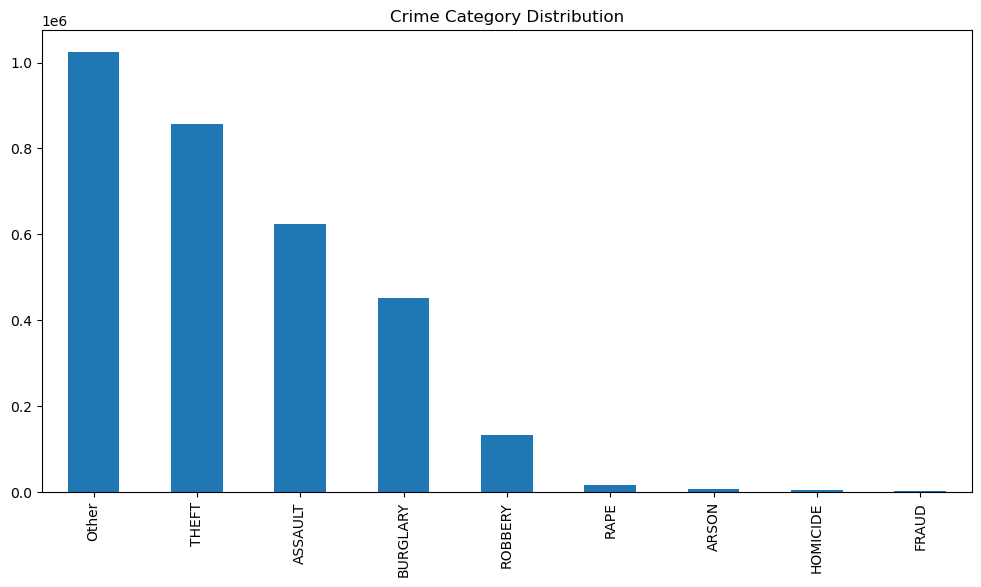

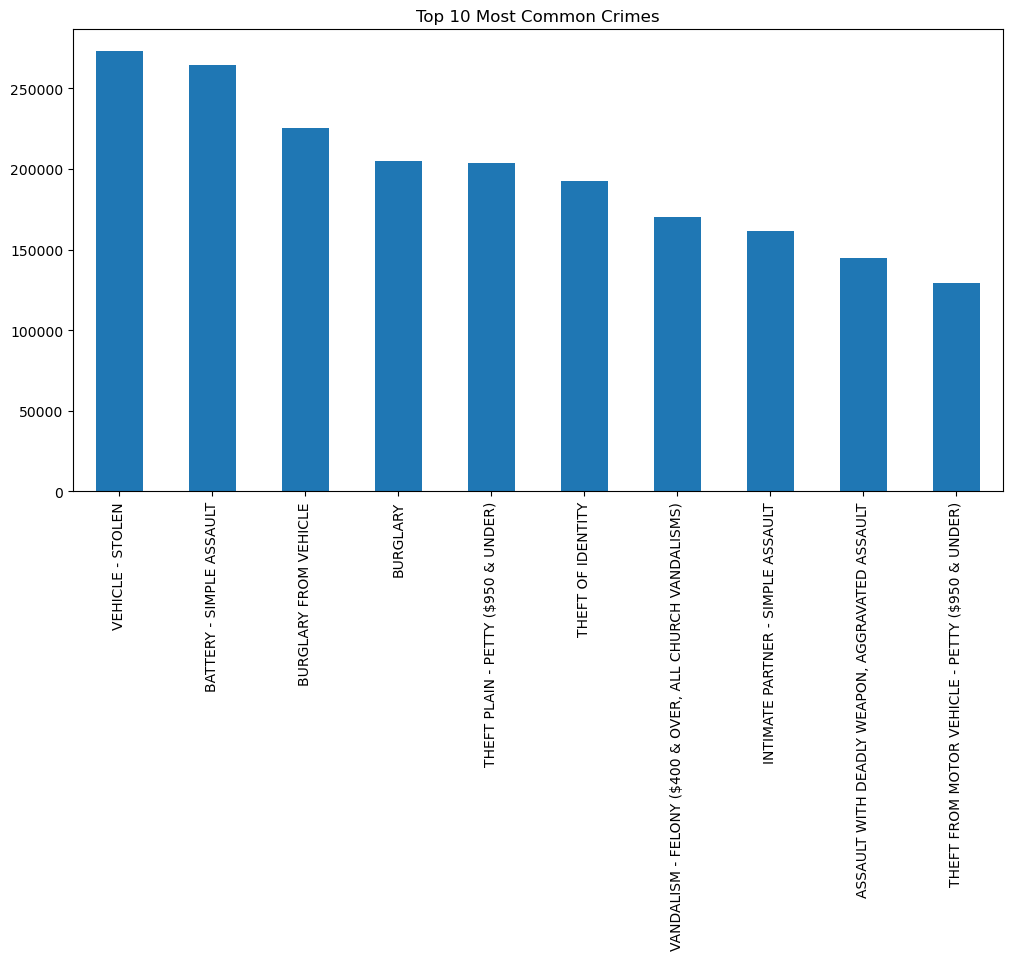

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Change crime_categories to a dictionary instead of a set
crime_categories = {
    'ASSAULT': ['ASSAULT'],
    'HOMICIDE': ['HOMICIDE'],
    'ROBBERY': ['ROBBERY'],
    'RAPE': ['RAPE'],
    'BURGLARY': ['BURGLARY'],
    'THEFT': ['THEFT'],
    'GRAND THEFT AUTO': ['GRAND THEFT AUTO'],
    'ARSON': ['ARSON'],
    'FRAUD': ['FRAUD'],
    'SCAM': ['SCAM'],
    'IDENTITY THEFT': ['IDENTITY THEFT']
}

def categorize_crime(description):
    for category, keywords in crime_categories.items():
        if any(keyword in str(description).upper() for keyword in keywords):
            return category
    return 'Other'

final_data['Crime Category'] = final_data['Crm Cd Desc'].apply(categorize_crime)
final_data['Crime Category'].value_counts().plot(kind='bar', figsize=(12,6), title="Crime Category Distribution")
plt.show()
crime_counts = final_data['Crm Cd Desc'].value_counts().head(10)  # Top 10 crime types
crime_counts.plot(kind='bar', figsize=(12,6), title="Top 10 Most Common Crimes")
plt.show()

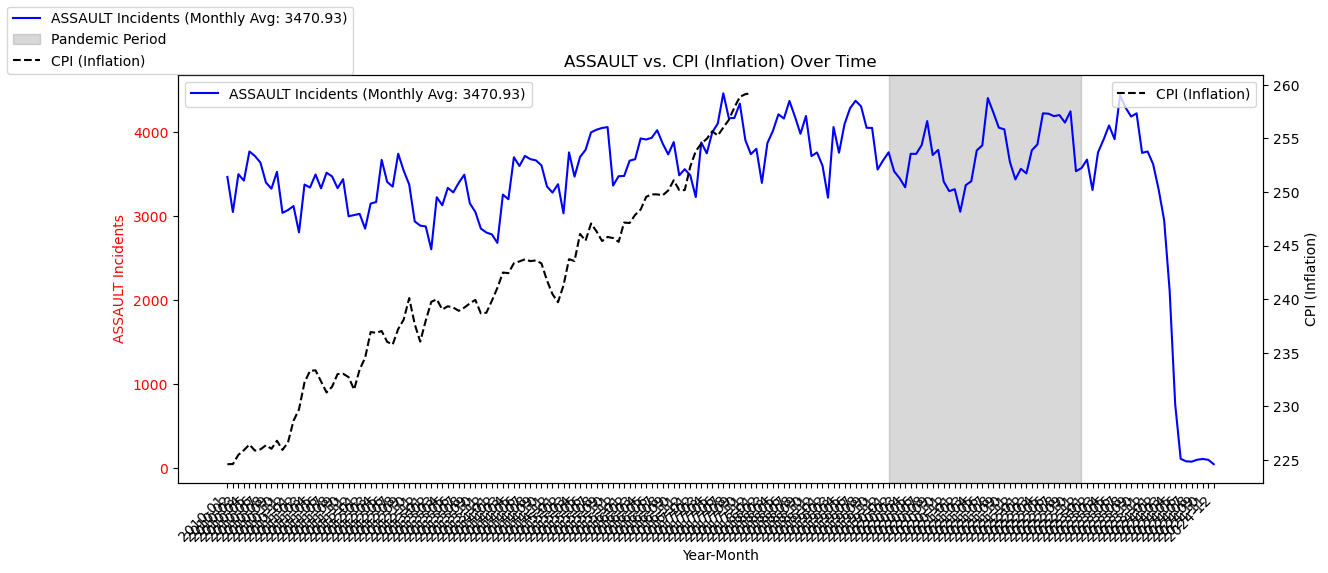

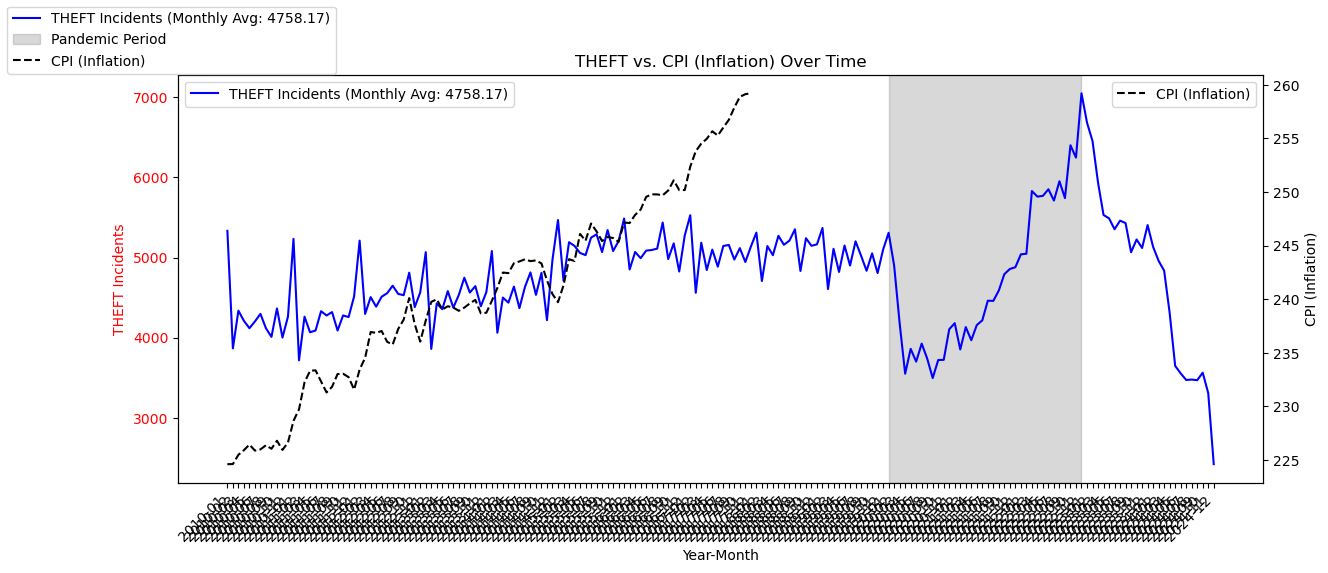

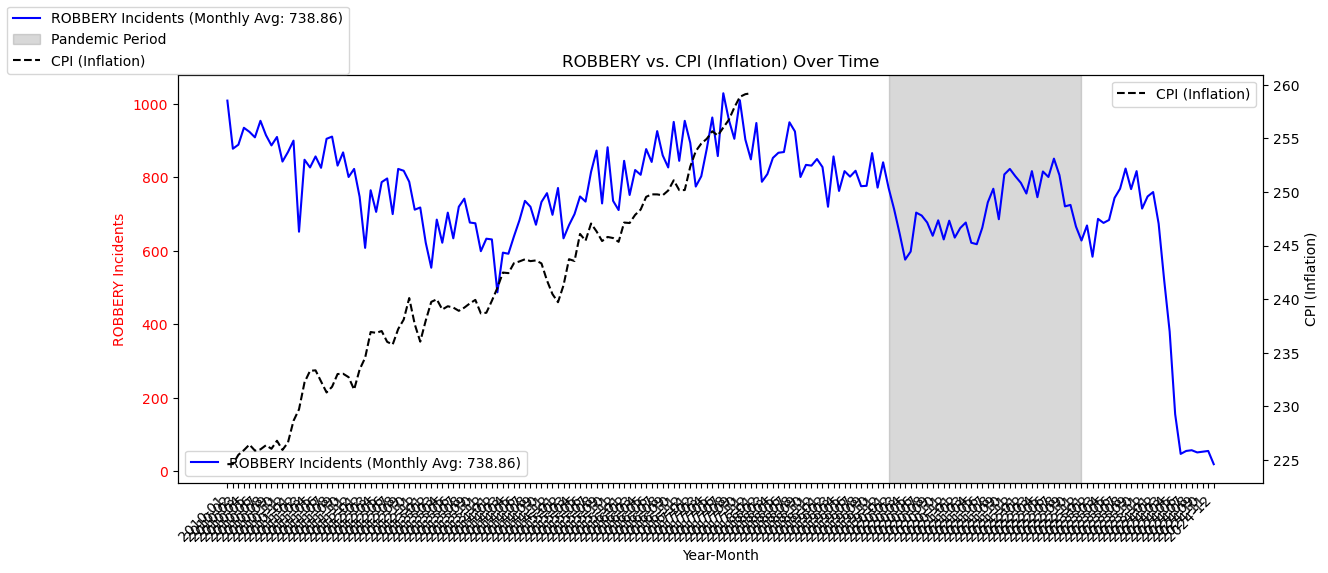

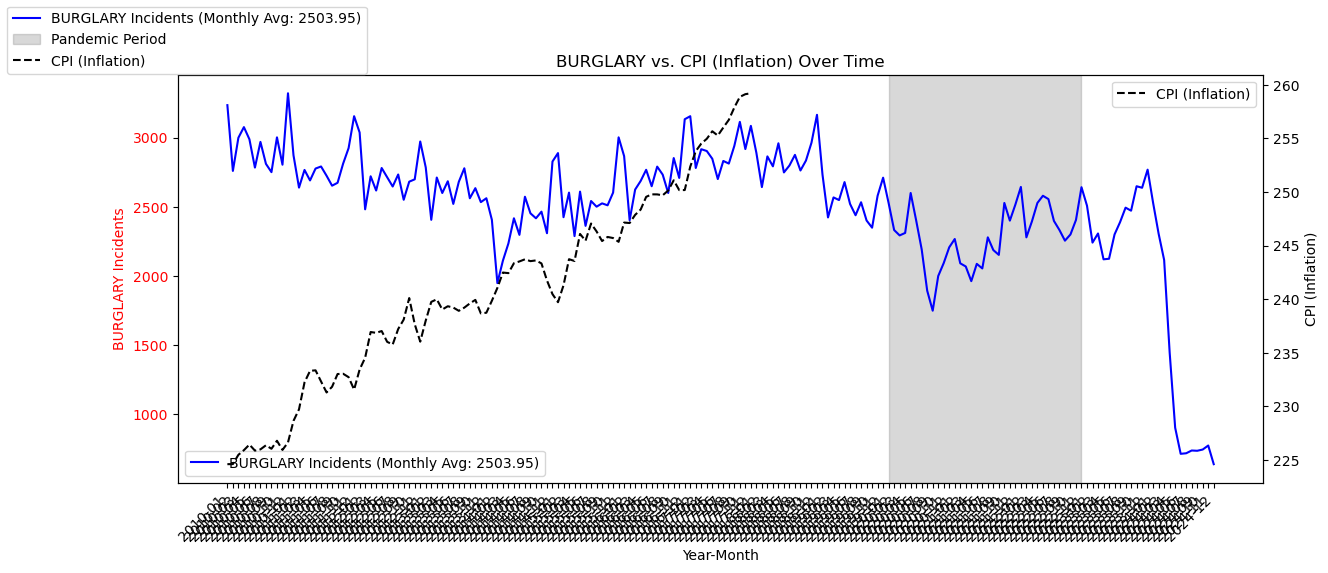

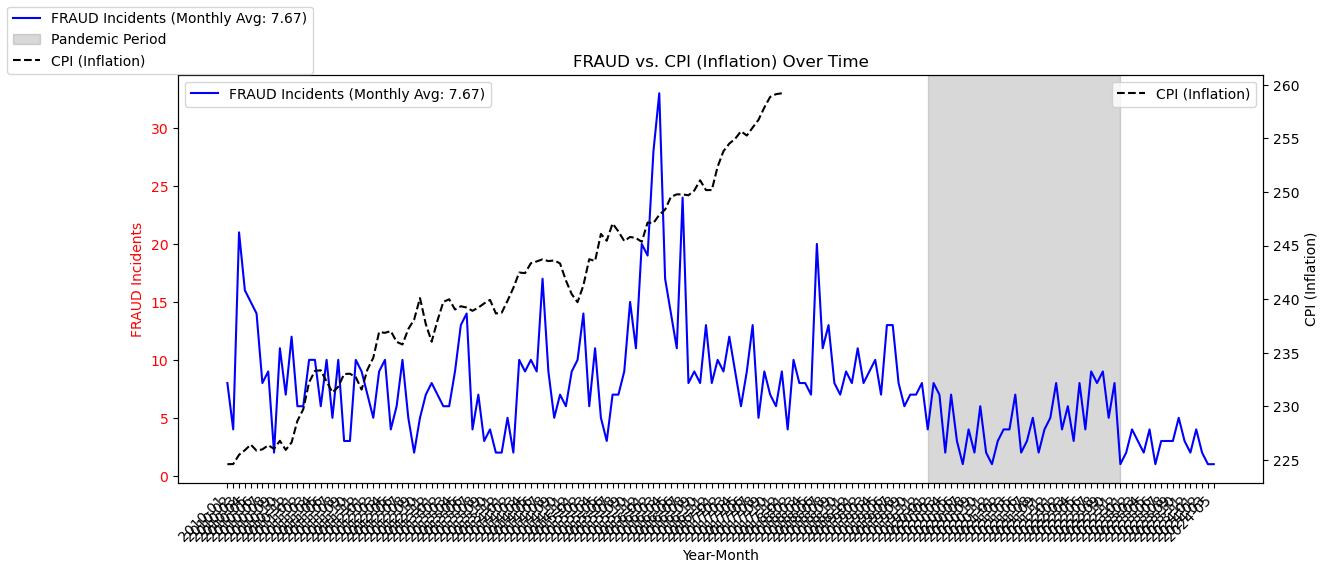

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert DATE OCC to datetime format
final_data["DATE OCC"] = pd.to_datetime(final_data["DATE OCC"], errors="coerce")

# Extract Year-Month for aggregation
final_data["YearMonth"] = final_data["DATE OCC"].dt.to_period("M").astype(str)

# Define the pandemic period (Jan 2020 - Dec 2022)
pandemic_start, pandemic_end = "2020-01", "2022-12"

# List of crime categories to visualize
crime_categories = ["ASSAULT", "THEFT", "ROBBERY", "BURGLARY", "FRAUD"]

# Loop through each crime category
for crime in crime_categories:
    # Aggregate crime counts by YearMonth and calculate the monthly average
    crime_trends = final_data[final_data["Crime Category"] == crime].groupby("YearMonth").size()
    monthly_avg_crime = crime_trends.mean()  # Calculate the monthly average

    # Aggregate CPI data by YearMonth
    cpi_trends = final_data.groupby("YearMonth")["CPI"].mean()

    # Merge datasets for visualization
    crime_economic_trends = crime_trends.to_frame(name=crime).join(cpi_trends, how="left").reset_index()

    # Create plot
    fig, ax1 = plt.subplots(figsize=(14, 6))

    # Plot crime category on the left Y-axis
    ax1.set_xlabel("Year-Month")
    ax1.set_ylabel(f"{crime} Incidents", color="red")
    sns.lineplot(x=crime_economic_trends["YearMonth"], y=crime_economic_trends[crime],
                 label=f"{crime} Incidents (Monthly Avg: {monthly_avg_crime:.2f})", color="blue", ax=ax1)
    ax1.tick_params(axis="y", labelcolor="red")

    # Create a second Y-axis for CPI
    ax2 = ax1.twinx()
    ax2.set_ylabel("CPI (Inflation)", color="black")
    sns.lineplot(x=crime_economic_trends["YearMonth"], y=crime_economic_trends["CPI"],
                 label="CPI (Inflation)", color="black", linestyle="dashed", ax=ax2)
    ax2.tick_params(axis="y", labelcolor="black")

    # Highlight pandemic period
    ax1.axvspan(pandemic_start, pandemic_end, color="gray", alpha=0.3, label="Pandemic Period")

    # Add title and format x-axis
    plt.title(f"{crime} vs. CPI (Inflation) Over Time")
    fig.autofmt_xdate(rotation=45)
    fig.legend(loc="upper left")

    # Save the plot as a PNG file
    plt.savefig(f"{crime}_vs_CPI.png", dpi=300, bbox_inches="tight")

    # Show the plot
    plt.show()

In [ ]:
# Prepare monthly CPI from your dataset
cpi_data = final_data[['DATE OCC', 'CPI']].dropna().drop_duplicates()
cpi_data['Year-Month'] = cpi_data['DATE OCC'].dt.to_period('M')

monthly_cpi = (
    cpi_data.groupby('Year-Month')['CPI']
    .mean()
    .reset_index()
)
monthly_cpi['Year-Month'] = pd.to_datetime(monthly_cpi['Year-Month'].astype(str))


In [ ]:
def run_monthly_cpi_regression(crime_keyword, crime_label):
    # Filter crime type
    crime_data = final_data[final_data['Crm Cd Desc'].str.contains(crime_keyword, case=False, na=False)].copy()
    crime_data['Year-Month'] = crime_data['DATE OCC'].dt.to_period('M')

    # Monthly aggregation
    monthly_crime = (
        crime_data.groupby('Year-Month').size().reset_index(name=f'Monthly {crime_label} Incidents')
    )
    monthly_crime['Year-Month'] = pd.to_datetime(monthly_crime['Year-Month'].astype(str))

    # Merge with CPI
    merged = pd.merge(monthly_crime, monthly_cpi, on='Year-Month', how='inner').dropna()

    # Regression
    y = merged[f'Monthly {crime_label} Incidents']
    X = sm.add_constant(merged[['CPI']])
    model = sm.OLS(y, X).fit()

    print(f"\n📊 Regression: {crime_label} vs CPI")
    print(model.summary())


In [ ]:
run_monthly_cpi_regression('ASSAULT', 'Assault')
run_monthly_cpi_regression('THEFT', 'Theft')
run_monthly_cpi_regression('BURGLARY', 'Burglary')
run_monthly_cpi_regression('ROBBERY', 'Robbery')
run_monthly_cpi_regression('FRAUD', 'Fraud')



📊 Regression: Assault vs CPI
                                OLS Regression Results                               
Dep. Variable:     Monthly Assault Incidents   R-squared:                       0.326
Model:                                   OLS   Adj. R-squared:                  0.319
Method:                        Least Squares   F-statistic:                     45.43
Date:                       Tue, 08 Apr 2025   Prob (F-statistic):           1.26e-09
Time:                               22:26:54   Log-Likelihood:                -689.24
No. Observations:                         96   AIC:                             1382.
Df Residuals:                             94   BIC:                             1388.
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [ ]:
import pandas as pd

# Assuming 'final_data' is your dataset
final_data_grouped = final_data.groupby(['AREA NAME', 'DATE OCC']).size().reset_index(name='Crime Count')

# Merge with unemployment or CPI data accordingly


In [ ]:
final_data['Year-Month'] = final_data['DATE OCC'].dt.to_period('M')

monthly_area_crime = final_data.groupby(['AREA NAME', 'Year-Month']).size().reset_index(name='Crime Count')
monthly_area_crime['Year-Month'] = monthly_area_crime['Year-Month'].dt.to_timestamp()


In [ ]:
# Assume econ_data has columns ['Year-Month', 'Unemployment', 'CPI']
merged_data = monthly_area_crime.merge(econ_data, on='Year-Month', how='left')


In [ ]:
import statsmodels.formula.api as smf

# Example Panel Regression Model
panel_model = smf.ols('Q("Crime Count") ~ Unemployment + CPI + C(Q("AREA NAME"))', data=merged_data).fit()
print(panel_model.summary())


                            OLS Regression Results                            
Dep. Variable:       Q("Crime Count")   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     283.3
Date:                Tue, 08 Apr 2025   Prob (F-statistic):               0.00
Time:                        22:27:12   Log-Likelihood:                -11672.
No. Observations:                2016   AIC:                         2.339e+04
Df Residuals:                    1993   BIC:                         2.352e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep